# Line Safari
This is a coding problem taken from the website *codewars.com*. <br /> <br />*Difficulty: 3 kyu ("green belt")* <br /> <br />
**Description:** <br /> <br />
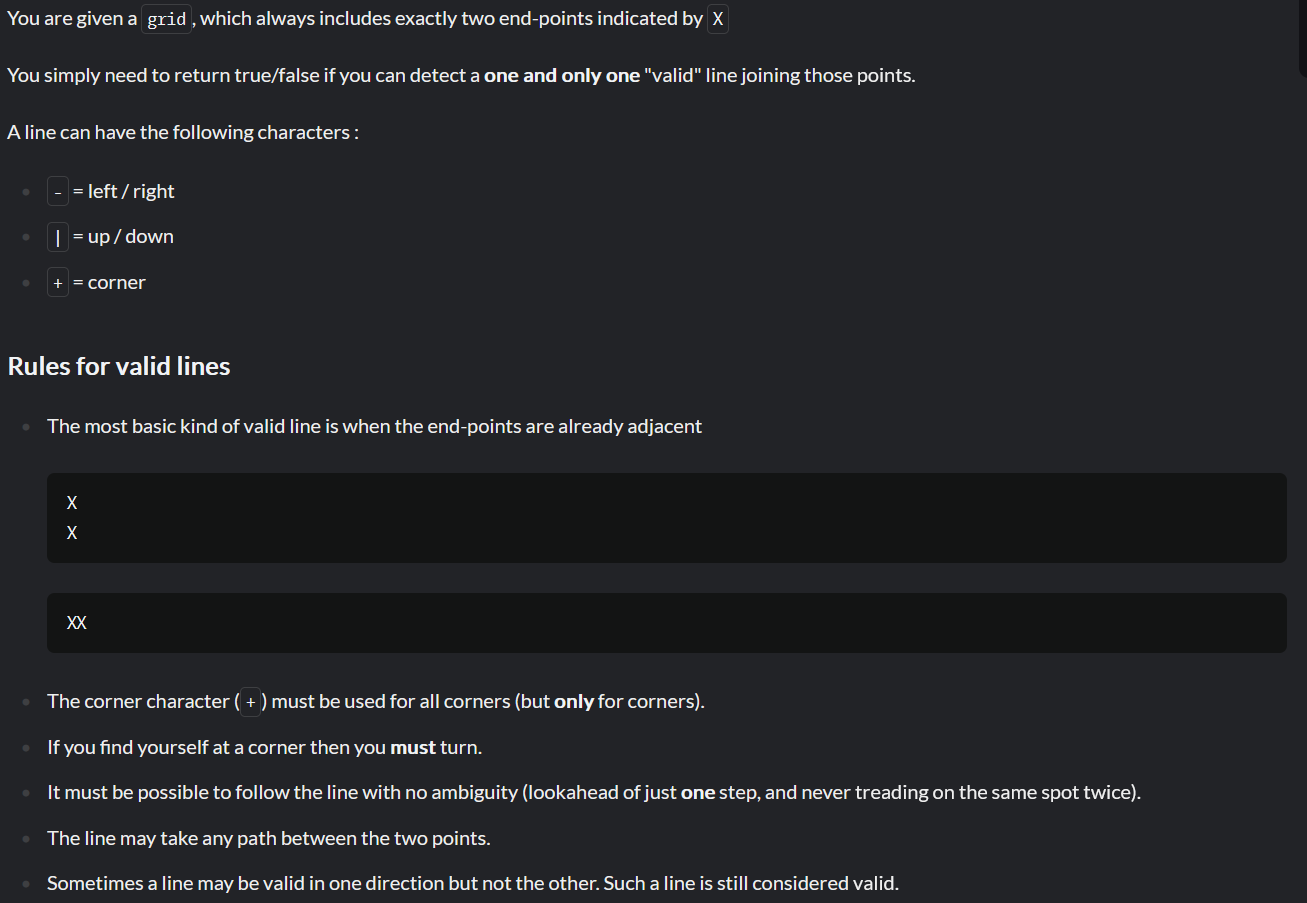

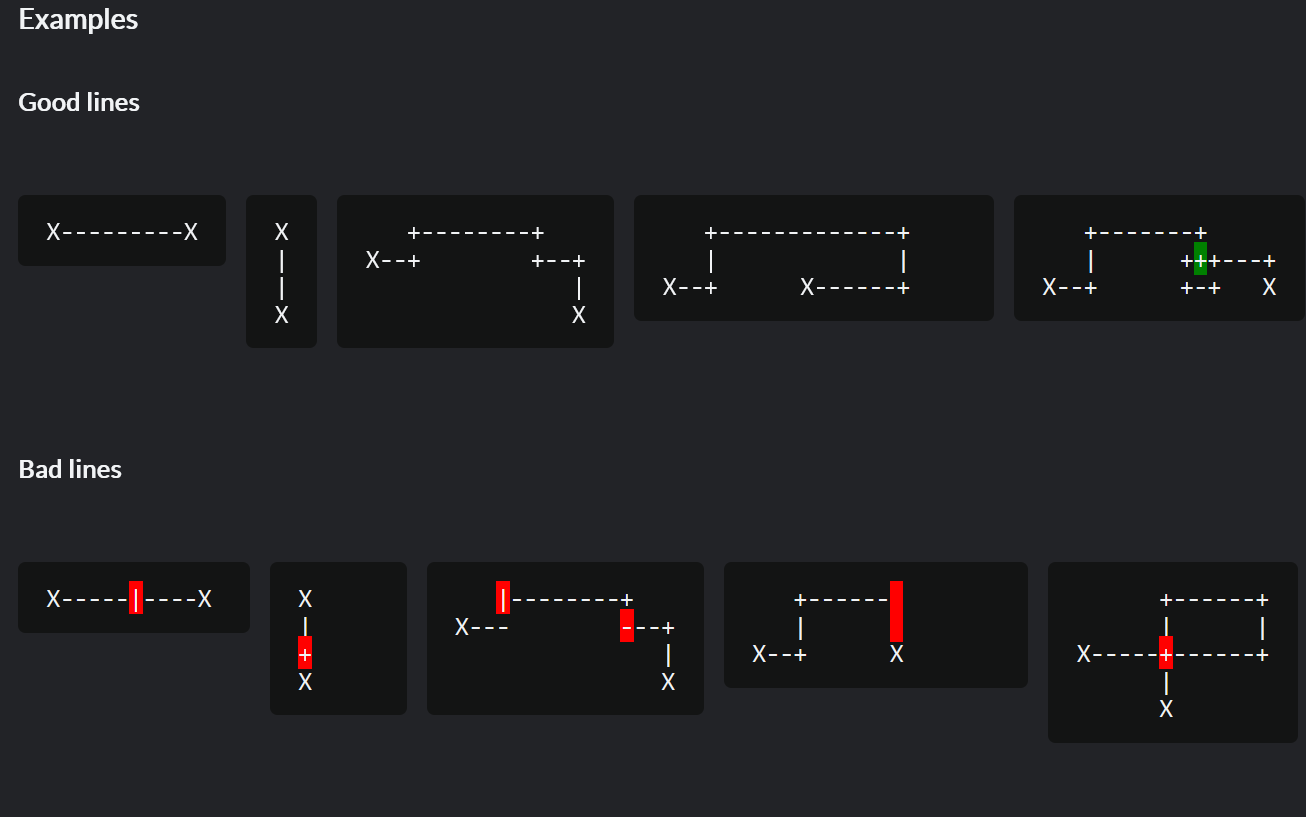

**Solution:**

My solution begins with creating two helper functions: One for checking if a character is valid in regards to the rules, the other one for finding the next path at a junction:

In [1]:
def valid(character, direction):
  """
  Input: a character and direction ([y,x]) from which it is approached. Format: character, list
  Output: True if the character is valid in that context. Format: bool
  + and X are always valid
  - and | are only valid when they are they are part of a path
  """
  if character == "+": return True
  if character == "X": return True
  if (character == "-" and direction[0] == 0): return True
  if (character == "|" and direction[1] == 0): return True

  return False

In [7]:
def find_direction(grid, coordinates_in, direction_in):
  """
  Input: grid element, coordinates of element and direction from which it is approached. Format: list, list, list
  Output: Direction in which to proceed. Format: list

  This function is used on "+" and at the starting point. It searches the nearby area for a path and returns a valid direction
  """
   
  if grid[coordinates_in[0]][coordinates_in[1]] == "X":
    possible_directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]

  elif grid[coordinates_in[0]][coordinates_in[1]] == "+":
      if direction_in[0] == 0: 
          possible_directions = [[1, 0], [-1, 0]]
      elif direction_in[1] == 0: 
          possible_directions = [[0, 1], [0, -1]]

  next_step = []
  for direction_candidate in possible_directions: # Try out every option
      possible_coordinates = [coordinates_in[0] + direction_candidate[0], coordinates_in[1] + direction_candidate[1]]
      if (0 <= possible_coordinates[0] < len(grid)) and (0 <= possible_coordinates[1] < len(grid[0])): # If option is in array range
          character = grid[possible_coordinates[0]][possible_coordinates[1]]
          if valid(character, direction_candidate):
              next_step.append(direction_candidate)
             
  if len(next_step) == 1: 
      return next_step[0]
  else: # If there are more than one step or none at all, the grid is not valid in that direction
      print("Invalid grid (",len(next_step),"possible_directions )")
      return False

Now the main function can parse through the passed grid one step at a time and will return wether the grid is valid.

In [10]:
def line(grid):

  print('\n'.join(grid))
    
  # FIND THE TWO X's
  location_of_x_characters = []
    
  for y_coordinate in range(len(grid)):
      for x_coordinate in range(len(grid[0])):
          if grid[y_coordinate][x_coordinate] == "X": 
              location_of_x_characters.append([y_coordinate, x_coordinate])
            
  if len(location_of_x_characters) != 2: 
    print("Invalid grid")
    return False # There have to be two X's otherwise grid is invalid
      
  # START ON FIRST X (START ON 2ND IF 1 INVALID)
  for tries in [0, 1]:
      parser = location_of_x_characters[tries] # If the grid is invalid from one direction, it restarts on the second X
      parser_direction = find_direction(grid, parser, [0,0])

      while parser_direction != False:

          # Take step:
          parser = [parser[0] + parser_direction[0], parser[1] + parser_direction[1]]
          print(f"Parsing {parser}")

          # Calculate next step:
          if grid[parser[0]][parser[1]] == "X": # Found the second X
              return True

          if not valid(grid[parser[0]][parser[1]], parser_direction): # If there is an invalid character
              print(f"Invalid character at {parser}")
              return False

          if grid[parser[0]][parser[1]] == "+": # If there is a junction
              parser_direction = find_direction(grid, parser, parser_direction)
  return False

<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\acf137\AppData\Local\Temp\ipykernel_8064\3858662965.py:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(location_of_x_characters) is not 2:


**Tests:**

In [4]:
grid = ["           ",
        "X---------X",
        "           ",
        "           "]
print(line(grid))

           
X---------X
           
           
Parsing [1, 1]
Parsing [1, 2]
Parsing [1, 3]
Parsing [1, 4]
Parsing [1, 5]
Parsing [1, 6]
Parsing [1, 7]
Parsing [1, 8]
Parsing [1, 9]
Parsing [1, 10]
True


In [5]:
grid = ["                     ",
        "    +-------------+  ",
        "    |             |  ",
        " X--+      X------+  ",
        "                     "]
print(line(grid))

                     
    +-------------+  
    |             |  
 X--+      X------+  
                     
Parsing [3, 2]
Parsing [3, 3]
Parsing [3, 4]
Parsing [2, 4]
Parsing [1, 4]
Parsing [1, 5]
Parsing [1, 6]
Parsing [1, 7]
Parsing [1, 8]
Parsing [1, 9]
Parsing [1, 10]
Parsing [1, 11]
Parsing [1, 12]
Parsing [1, 13]
Parsing [1, 14]
Parsing [1, 15]
Parsing [1, 16]
Parsing [1, 17]
Parsing [1, 18]
Parsing [2, 18]
Parsing [3, 18]
Parsing [3, 17]
Parsing [3, 16]
Parsing [3, 15]
Parsing [3, 14]
Parsing [3, 13]
Parsing [3, 12]
Parsing [3, 11]
True


In [6]:
grid = ["      +------+",
        "      |      |",
        "X-----+------+",
        "      |       ",
        "      X       "]
print(line(grid))

      +------+
      |      |
X-----+------+
      |       
      X       
Parsing [2, 1]
Parsing [2, 2]
Parsing [2, 3]
Parsing [2, 4]
Parsing [2, 5]
Parsing [2, 6]
Invalid grid ( 2 options )
Parsing [3, 6]
Parsing [2, 6]
Invalid grid ( 2 options )
False
